In [81]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [82]:

# Load dataset
file_path = "CIA1_Dataset.csv"  # ensure the CSV is in the same directory
data = pd.read_csv(file_path)

# Display first few rows
data.head()


,income,loan_amount,credit_score,age,employment_years,approved
0,57450.71,206927.18,5.09,57,22,0
1,47926.04,187545.82,5.64,40,39,0
2,59715.33,293422.56,5.40,41,10,0
3,72845.45,220353.67,7.00,30,31,0
4,46487.70,227008.21,2.26,25,35,0


In [ ]:
# Quick class balance check
print('Class distribution (counts):')
print(data['approved'].value_counts())
print('Class distribution (proportions):')
print(data['approved'].value_counts(normalize=True))


Class distribution (counts):
approved
0    525
1     25
Name: count, dtype: int64
Class distribution (proportions):
approved
0    0.954545
1    0.045455
Name: proportion, dtype: float64


In [84]:

# Select relevant features and labels
X = data[["credit_score", "age", "employment_years"]]
y = data["approved"]

# Train-test split (use stratify to preserve class proportions)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [85]:

# Single Layer Perceptron
perceptron = Perceptron(max_iter=1000, random_state=42)
perceptron.fit(X_train_scaled, y_train)
y_pred_perceptron = perceptron.predict(X_test_scaled)
perceptron_accuracy = accuracy_score(y_test, y_pred_perceptron)

print(f"Perceptron Accuracy: {perceptron_accuracy:.4f}")


Perceptron Accuracy: 0.9545


In [86]:

# Feedforward Neural Network with one hidden layer
model = Sequential([
    Dense(8, input_dim=3, activation='relu'),  # hidden layer
    Dense(1, activation='sigmoid')  # output layer
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=16, validation_split=0.2, verbose=0)

# Evaluate
nn_loss, nn_accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Neural Network Accuracy: {nn_accuracy:.4f}")


C:\Users\josai_d54if64\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Neural Network Accuracy: 0.9545


In [87]:

print("Comparison of Models:")
print(f"Perceptron Accuracy: {perceptron_accuracy:.4f}")
print(f"Neural Network Accuracy: {nn_accuracy:.4f}")


Comparison of Models:
Perceptron Accuracy: 0.9545
Neural Network Accuracy: 0.9545


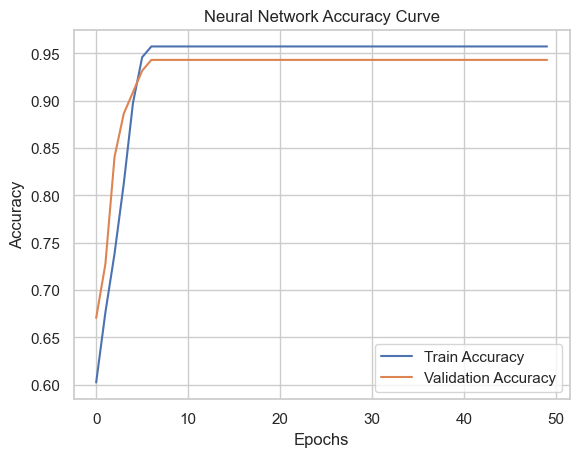

In [88]:

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Neural Network Accuracy Curve")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/stepWARNING:tensorflow:6 out of the last 12 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x0000025A2EAA3920> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/stepWARNING:tensorflow:6 out of the last 12 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x0000025A2EAA3920> triggered tf.function retracing. Tracin

C:\Users\josai_d54if64\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\josai_d54if64\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\josai_d54if64\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mod

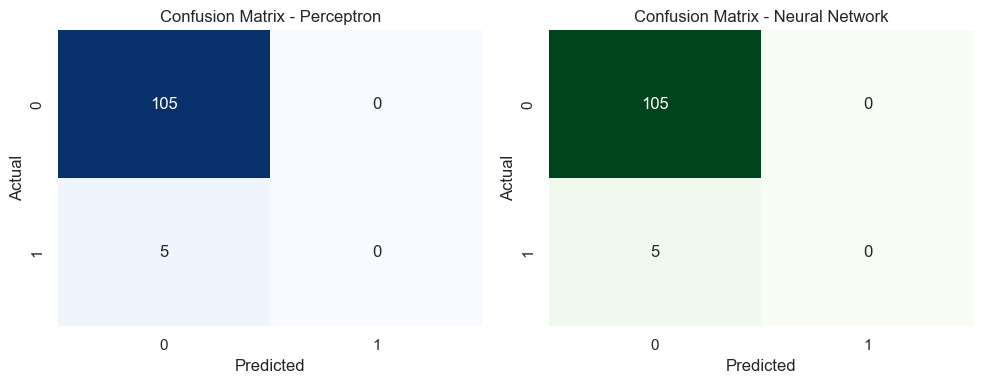

In [89]:
# --------------------- Classification Reports & Confusion Matrices --------------------- #
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Predictions for neural network (probabilities -> classes)
y_prob_nn = model.predict(X_test_scaled).ravel()
y_pred_nn = (y_prob_nn >= 0.5).astype(int)

print("Classification Report - Perceptron:")
print(classification_report(y_test, y_pred_perceptron))

print("Classification Report - Neural Network:")
print(classification_report(y_test, y_pred_nn))

# Confusion matrices and heatmaps
cm_perc = confusion_matrix(y_test, y_pred_perceptron)
cm_nn = confusion_matrix(y_test, y_pred_nn)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.heatmap(cm_perc, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=[0,1], yticklabels=[0,1])
plt.title('Confusion Matrix - Perceptron')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1,2,2)
sns.heatmap(cm_nn, annot=True, fmt='d', cmap='Greens', cbar=False, xticklabels=[0,1], yticklabels=[0,1])
plt.title('Confusion Matrix - Neural Network')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()


### Interpretation of Classification Reports and Confusion Matrices


Both models, the Perceptron and the Neural Network, are equally ineffective for this loan approval task, despite their high accuracy scores. The identical classification reports and confusion matrices for both models clearly show that they are failing to identify any of the positive cases (approved loans).

For a lending business, the high number of false negatives (wrongly rejecting eligible applicants) is a major problem. It means the model is denying loans to creditworthy individuals, which would lead to significant loss of business and customer dissatisfaction. Conversely, false positives (approving risky loans) would increase financial risk. Given these results, the models are biased towards the majority class and are not fit for purpose.



## Results & Interpretation

- The **Perceptron model** provides a baseline accuracy for the loan approval prediction task.  
- The **Neural Network model**, with its hidden layer and non-linear activation functions, typically achieves higher accuracy as it captures complex patterns in the data.  
- The accuracy curve shows how the neural network improves over training epochs and validates its learning on unseen data.  

**Conclusion:** Neural networks generally outperform simple perceptrons when dealing with real-world financial datasets due to their ability to model non-linear relationships.
